## Problem Statement

### Unsupervised Learning

Given the ‘credit_card’ dataset, below is the data definition

1) CUSTID: Identification of Credit Card holder (Categorical)\
2) BALANCE: Balance amount left in their account to make purchases\
3) BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = 
frequently updated, 0 = not frequently updated)\
4) PURCHASES: Amount of purchases made from account\
5) ONEOFFPURCHASES: Maximum purchase amount done in one-go\
6) INSTALLMENTSPURCHASES: Amount of purchase done in installment\
7) CASHADVANCE: Cash in advance given by the user\
8) PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 
(1 = frequently purchased, 0 = not frequently purchased)\
9) ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = 
frequently purchased, 0 = not frequently purchased)\
10) PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being 
done (1 = frequently done, 0 = not frequently done)\
11) CASHADVANCEFREQUENCY: How frequently the cash in advance being paid\
12) CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"\
13) PURCHASESTRX: Number of purchase transactions made\
14) CREDITLIMIT: Limit of Credit Card for user\
15) PAYMENTS: Amount of Payment done by user\
16) MINIMUM_PAYMENTS: Minimum amount of payments made by user\
17) PRCFULLPAYMENT: Percent of full payment paid by use\
18) TENURE: Tenure of credit card service for user

In [ ]:
#Import basic libraries to start work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Read the Data
df=pd.read_csv("/content/drive/MyDrive/credit_card.csv")

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [ ]:
df.shape

(8950, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Primary Analysis Of Categorical Features
we have only one categorical variable so i extracted a categorical column from cust_id column and doing analysis

In [ ]:
print(df.CUST_ID.unique())

['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']


In [ ]:
h=df.CUST_ID.str[0:3]

In [ ]:
h.value_counts()

C12    978
C17    976
C14    975
C16    975
C13    974
C18    973
C15    972
C11    972
C10    966
C19    189
Name: CUST_ID, dtype: int64

In [ ]:
df["Customer_class"]=h

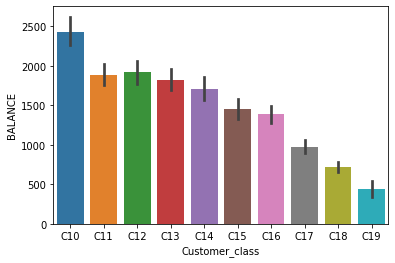

In [ ]:
sns.barplot(x="Customer_class",y="BALANCE",data=df)

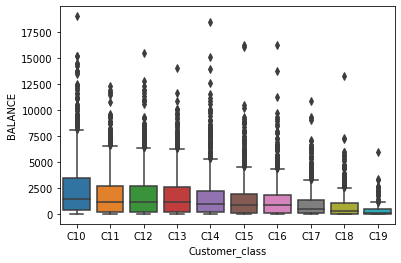

In [ ]:
sns.boxplot(x="Customer_class",y="BALANCE",data=df)

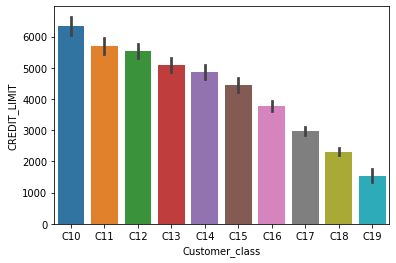

In [ ]:
sns.barplot(x="Customer_class",y="CREDIT_LIMIT",data=df)

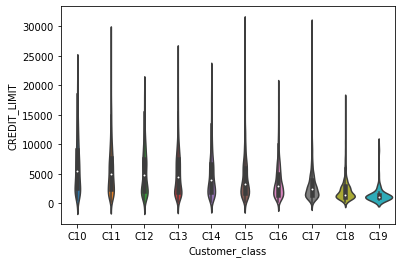

In [ ]:
sns.violinplot(x="Customer_class",y="CREDIT_LIMIT",data=df)

In [ ]:
#As we can observe that there is difference in Income and Credid card limit of different customers
#We can observe outliers in our data.

### Exploratory Data Analysis

#### Missing value analysis

In [ ]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
Customer_class                        0
PURCHASES_FREQUENCY                   0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
TENURE                                0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
PRC_FULL_PAYMENT                      0
CUST_ID                               0
dtype: int64

In [ ]:
#We have two column swith missing values
#Let's look at the columns once

In [ ]:
df.MINIMUM_PAYMENTS

0        139.509787
1       1072.340217
2        627.284787
3               NaN
4        244.791237
           ...     
8945      48.886365
8946            NaN
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64

In [ ]:
df.CREDIT_LIMIT

0       1000.0
1       7000.0
2       7500.0
3       7500.0
4       1200.0
         ...  
8945    1000.0
8946    1000.0
8947    1000.0
8948     500.0
8949    1200.0
Name: CREDIT_LIMIT, Length: 8950, dtype: float64

In [ ]:
#Filling missing values with mean
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(),inplace=True)
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(),inplace=True)

In [ ]:
#Let's check our dataframe is nul values are imputed or not?
df.isnull().sum().sort_values(ascending=False)

Customer_class                      0
ONEOFF_PURCHASES_FREQUENCY          0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
PURCHASES_INSTALLMENTS_FREQUENCY    0
TENURE                              0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
CUST_ID                             0
dtype: int64

### Outlier treament with Z score method


In [ ]:
from scipy.stats import zscore

In [ ]:
z_score=zscore(df.drop(["CUST_ID","Customer_class"],axis=1))

In [ ]:
z_score=pd.DataFrame(z_score)

In [ ]:
z_score["CUST_ID"]=df["CUST_ID"]

In [ ]:
z_score

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,CUST_ID
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.360680,C10001
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680,C10002
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.360680,C10003
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-5.366135e-16,-0.525551,0.360680,C10004
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.360680,C10005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498541e-01,1.183951,-4.122768,C19186
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,-5.366135e-16,-0.525551,-4.122768,C19187
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354655e-01,0.329200,-4.122768,C19188
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-3.469065e-01,0.329200,-4.122768,C19189


In [ ]:
#Removing otliers column by column

In [ ]:
z_score.iloc[:,0]

0      -0.731989
1       0.786961
2       0.447135
3       0.049099
4      -0.358775
          ...   
8945   -0.737950
8946   -0.742423
8947   -0.740398
8948   -0.745174
8949   -0.572575
Name: 0, Length: 8950, dtype: float64

In [ ]:
z_score_new=z_score[(z_score.iloc[:,0]<3) & (z_score.iloc[:,0]>-3)]
z_score_new.shape

(8754, 18)

In [ ]:
z_score_new=z_score_new[(z_score_new.iloc[:,1]<3) & (z_score_new.iloc[:,1]>-3)]
z_score_new.shape

(8578, 18)

In [ ]:
z_score_new=z_score_new[(z_score_new.iloc[:,2]<3) & (z_score_new.iloc[:,2]>-3)]
z_score_new.shape

(8465, 18)

In [ ]:
z_score_new=z_score_new[(z_score_new.iloc[:,3]<3) & (z_score_new.iloc[:,3]>-3)]
z_score_new.shape

(8438, 18)

In [ ]:
z_score_new=z_score_new[(z_score_new.iloc[:,4]<3) & (z_score_new.iloc[:,4]>-3)]
z_score_new.shape

(8372, 18)

In [ ]:
z_score_new=z_score_new[(z_score_new.iloc[:,5]<3) & (z_score_new.iloc[:,5]>-3)]
z_score_new.shape

(8234, 18)

In [ ]:
z_score_new=z_score_new[(z_score_new.iloc[:,6]<3) & (z_score_new.iloc[:,6]>-3)]
z_score_new.shape

(8234, 18)

In [ ]:
z_score_new=z_score_new[(z_score_new.iloc[:,7]<3) & (z_score_new.iloc[:,7]>-3)]
z_score_new.shape

(8234, 18)

In [ ]:
z_score_new=z_score_new[(z_score_new.iloc[:,8]<3) & (z_score_new.iloc[:,8]>-3)]
z_score_new.shape

(8234, 18)

In [ ]:
z_score_new=z_score_new[(z_score_new.iloc[:,9]<3) & (z_score_new.iloc[:,9]>-3)]
z_score_new.shape

(8095, 18)

In [ ]:
z_score_new=z_score_new[(z_score_new.iloc[:,10]<3) & (z_score_new.iloc[:,10]>-3)]
z_score_new.shape

(8042, 18)

In [ ]:
z_score_new=z_score_new[(z_score_new.iloc[:,11]<3) & (z_score_new.iloc[:,11]>-3)]
z_score_new.shape

(7960, 18)

In [ ]:
z_score_new=z_score_new[(z_score_new.iloc[:,12]<3) & (z_score_new.iloc[:,12]>-3)]
z_score_new.shape

(7891, 18)

In [ ]:
z_score_new=z_score_new[(z_score_new.iloc[:,13]<3) & (z_score_new.iloc[:,13]>-3)]
z_score_new.shape

(7434, 18)

In [ ]:
z_score_new=z_score_new[(z_score_new.iloc[:,14]<3) & (z_score_new.iloc[:,14]>-3)]
z_score_new.shape

(7817, 18)

In [ ]:
z_score_new=z_score_new[(z_score_new.iloc[:,15]<3) & (z_score_new.iloc[:,15]>-3)]
z_score_new.shape

(7817, 18)

In [ ]:
z_score_new=z_score_new[(z_score_new.iloc[:,16]<3) & (z_score_new.iloc[:,16]>-3)]
z_score_new.shape

(7434, 18)

In [ ]:
z_score_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,CUST_ID
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,C10001
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,C10002
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,C10003
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-5.366135e-16,-0.525551,0.36068,C10004
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,C10005


In [ ]:
z_score_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7464 entries, 0 to 8880
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        7464 non-null   float64
 1   1        7464 non-null   float64
 2   2        7464 non-null   float64
 3   3        7464 non-null   float64
 4   4        7464 non-null   float64
 5   5        7464 non-null   float64
 6   6        7464 non-null   float64
 7   7        7464 non-null   float64
 8   8        7464 non-null   float64
 9   9        7464 non-null   float64
 10  10       7464 non-null   float64
 11  11       7464 non-null   float64
 12  12       7464 non-null   float64
 13  13       7464 non-null   float64
 14  14       7464 non-null   float64
 15  15       7464 non-null   float64
 16  16       7464 non-null   float64
 17  CUST_ID  7464 non-null   object 
dtypes: float64(17), object(1)
memory usage: 1.1+ MB


#### Dealing with correlated variables in our dataset

In [ ]:
#Checking correlation in variables

In [ ]:
z_score_new.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,0.348764,0.046510,0.081963,-0.034762,0.507132,-0.143576,0.032355,-0.138198,0.467679,0.437686,0.012804,0.403044,0.215367,0.612009,-0.376361,0.057233
1,0.348764,1.000000,0.155246,0.115445,0.133816,0.074290,0.230522,0.180189,0.180310,0.184779,0.146579,0.212813,0.062461,0.002101,0.229045,-0.163749,0.102275
2,0.046510,0.155246,1.000000,0.877063,0.653140,-0.138773,0.555227,0.612767,0.412614,-0.194127,-0.152353,0.746776,0.297278,0.372031,0.040379,0.191296,0.072328
3,0.081963,0.115445,0.877063,1.000000,0.209167,-0.084740,0.338578,0.692465,0.097280,-0.119322,-0.091244,0.556534,0.284593,0.344538,0.016037,0.099546,0.045383
4,-0.034762,0.133816,0.653140,0.209167,1.000000,-0.149173,0.596746,0.155819,0.686813,-0.207223,-0.166471,0.643153,0.156485,0.214163,0.056785,0.232293,0.075568
5,0.507132,0.074290,-0.138773,-0.084740,-0.149173,1.000000,-0.288111,-0.122996,-0.239403,0.667334,0.690454,-0.171079,0.229347,0.349791,0.269991,-0.196917,-0.082796
6,-0.143576,0.230522,0.555227,0.338578,0.596746,-0.288111,1.000000,0.479829,0.855721,-0.353708,-0.291757,0.725215,0.114934,0.071159,-0.042668,0.304346,0.053168
7,0.032355,0.180189,0.612767,0.692465,0.155819,-0.122996,0.479829,1.000000,0.081315,-0.138563,-0.114825,0.584436,0.272293,0.203657,-0.025560,0.127104,0.061798
8,-0.138198,0.180310,0.412614,0.097280,0.686813,-0.239403,0.855721,0.081315,1.000000,-0.295186,-0.243711,0.642888,0.033464,0.039617,-0.021351,0.254086,0.053607
9,0.467679,0.184779,-0.194127,-0.119322,-0.207223,0.667334,-0.353708,-0.138563,-0.295186,1.000000,0.882944,-0.203342,0.059294,0.154436,0.247985,-0.272057,-0.077734


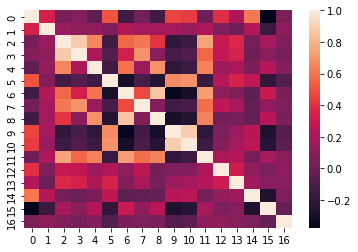

In [ ]:
sns.heatmap(z_score_new.corr())

In [ ]:
#better to do dimensionality reduction to get rid of correlated variables

## Dimensionality reduction with PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pc=PCA(n_components=10)

In [ ]:
x_train=pc.fit_transform(z_score_new.drop("CUST_ID",axis=1))

In [ ]:
Explained_variance=pc.explained_variance_ratio_

In [ ]:
Explained_variance_percentage=np.sum(Explained_variance)*100
print(Explained_variance_percentage)

95.22826836602263


In [ ]:
#With principal components of 10 we can explain 95% of the variance

In [ ]:
x_train=pd.DataFrame(x_train).drop("CUST_ID",axis=1)

## K Means Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# To decide optimal value of K, elbow plot of Within Cluster Sum of 
# Squared Errors(wss) is plotted and choose elbow point from where wss
# starts to reduce. Elbow point will be K value
wcss=[]
for i in range(1,15):
    km=KMeans(n_clusters=i)
    km.fit(x_train)
    wcss.append(km.inertia_)

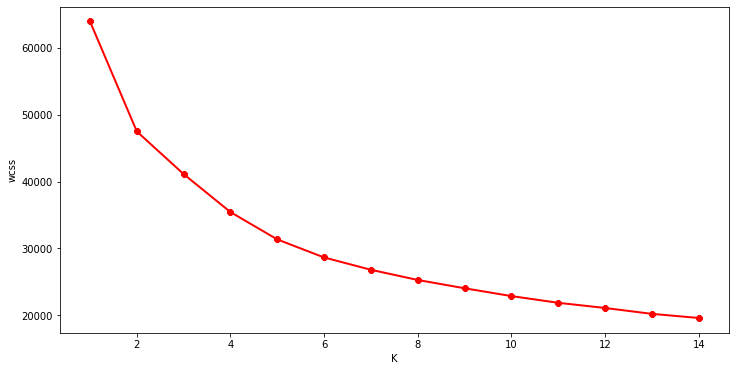

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,15),wcss,linewidth=2,color='red',marker='8')
plt.xlabel('K')
plt.ylabel('wcss')
plt.show()

In [ ]:
km=KMeans(n_clusters=6)

In [ ]:
km.fit(x_train)

KMeans(n_clusters=6)

In [ ]:
x_train["labels"]=km.labels_

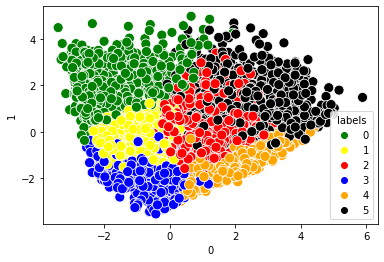

In [ ]:
sns.scatterplot(x=x_train.iloc[:,0],y=x_train.iloc[:,1],
               hue='labels',
               palette=['green','yellow','red','blue','orange','black'],
               data=x_train,s=100)

### Plotting Countplot for representing number of observations in each cluster

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


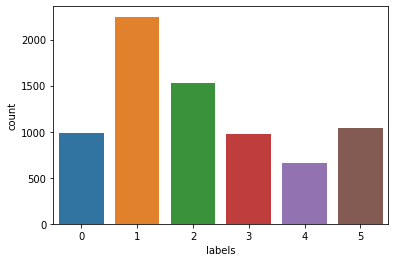

In [ ]:
sns.countplot(x_train.labels);

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
print(silhouette_score(x_train.drop("labels",axis=1),x_train.labels))

0.24175990444098602


## Task-2
### Sentiment Analysis with Deep Learning LSTM Model

### Problem statement
The data ‘sentiment.csv’ contains all information about the tweet, but for 
this exercise, use the text and sentiment(only positive and negative 
sentiments) columns

In [ ]:
dftrain=pd.read_csv("/content/drive/MyDrive/Sentiment.csv")

In [ ]:
dftrain.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,name,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,I_Am_Kenzi,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,PeacefulQuest,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,PussssyCroook,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,MattFromTexas31,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,sharonDay5,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [ ]:
data=dftrain[["text","sentiment"]]

In [ ]:
data["sentiment"].value_counts()

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


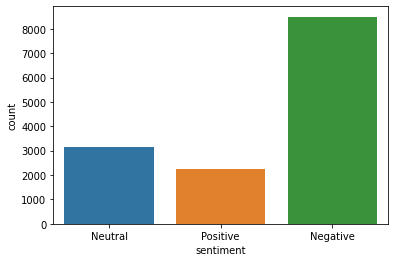

In [ ]:
sns.countplot(dftrain.sentiment);

## Sentiment Analysis with Sequential Lstm model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
import re

In [ ]:
data = data[data.sentiment != "Neutral"]
data['text'] = data['text'].apply(lambda x: x.lower())
# removing special chars
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
#
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,text,sentiment
1,rt scottwalker didnt catch the full gopdebate ...,Positive
3,rt robgeorge that carly fiorina is trending h...,Positive
4,rt danscavino gopdebate w realdonaldtrump deli...,Positive
5,rt gregabbott_tx tedcruz on my first day i wil...,Positive
6,rt warriorwoman91 i liked her and was happy wh...,Negative


In [ ]:
print(data[ data['sentiment'] == 'Positive'].size)
print(data[ data['sentiment'] == 'Negative'].size)

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt','')
data.head()

4472
16986


,text,sentiment
1,scottwalker didnt catch the full gopdebate la...,Positive
3,robgeorge that carly fiorina is trending hou...,Positive
4,danscavino gopdebate w realdonaldtrump delive...,Positive
5,gregabbott_tx tedcruz on my first day i will ...,Positive
6,warriorwoman91 i liked her and was happy when...,Negative


In [ ]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)
X[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         359,  120,    1,  692,    2,   39,   58,  234,   37,  207,    6,
         172, 1745,   12, 1308, 1394,  733],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          16,  281,  249,    5,  809,  102,  170,   26,  134,    6,    1,
         171,   12,    2,  231,  713,   17]], dtype=int32)

Next, I compose the LSTM Network. Note that embed_dim, lstm_out, batch_size, droupout_x variables are hyperparameters, their values are somehow intuitive, can be and must be played with in order to achieve good results. Please also note that I am using softmax as activation function. The reason is that our Network is using categorical crossentropy, and softmax is just the right activation method for that

In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 128)           256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 28, 128)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 2)                 394       
                                                                 
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
Y = pd.get_dummies(data['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(8583, 28) (8583, 2)
(2146, 28) (2146, 2)


### Train the model

In [ ]:
batch_size = 128
model.fit(X_train, Y_train, epochs = 15, batch_size=batch_size, verbose = 1)

Epoch 1/15
68/68 [==============================] - 25s 371ms/step - loss: 0.1297 - accuracy: 0.9454
Epoch 2/15
68/68 [==============================] - 25s 369ms/step - loss: 0.1239 - accuracy: 0.9490
Epoch 3/15
68/68 [==============================] - 25s 374ms/step - loss: 0.1230 - accuracy: 0.9492
Epoch 4/15
68/68 [==============================] - 25s 372ms/step - loss: 0.1155 - accuracy: 0.9504
Epoch 5/15
68/68 [==============================] - 26s 380ms/step - loss: 0.1147 - accuracy: 0.9505
Epoch 6/15
68/68 [==============================] - 26s 378ms/step - loss: 0.1151 - accuracy: 0.9540
Epoch 7/15
68/68 [==============================] - 26s 380ms/step - loss: 0.1065 - accuracy: 0.9547
Epoch 8/15
68/68 [==============================] - 26s 376ms/step - loss: 0.0993 - accuracy: 0.9584
Epoch 9/15
68/68 [==============================] - 25s 374ms/step - loss: 0.1015 - accuracy: 0.9560
Epoch 10/15
68/68 [==============================] - 25s 371ms/step - loss: 0.0962 - accura

In [ ]:
Y_pred = predictions = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
Y_pred

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]], dtype=int32)

## Predicting sentiment for following sentences

a. 'He is a great leader.'\
b. 'He is a terrible leader.'

In [ ]:
twt = ['He is a terrible leader.']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0  33   5   7 988 336]]
1/1 - 0s - 302ms/epoch - 302ms/step
negative


In [ ]:
twt = ['He is a great leader.']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0  33   5   7 144 336]]
1/1 - 0s - 34ms/epoch - 34ms/step
positive
